# 学習に関するテクニック
## パラメータの更新
### SGD(確率的勾配降下法 stochastic gradient descent)
パラメータの勾配を使って、勾配方向にパラメータを更新するというステップを繰り返す

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### Momentum
物体が勾配方向に力を受け、その力によって物体の速度が加算される物理法則、イメージは坂を転がるボール

In [5]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### AdaGrad
学習率の減衰(learning rate decay)を用いる、パラメータの要素ごとに適応的に学習係数を調整しながら学習を行う。
具体的にはパラメータの要素の中で大きく更新された要素は、学習係数が小さくなっていく

AdaはAdaptiveの意

In [7]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.h[key] += grads[key] * grads[key]
                params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0除算を防ぐため分母にεを加算

## アクティベーション分布
アクティベーションに偏りがあると、表現力に問題があるということになる。

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

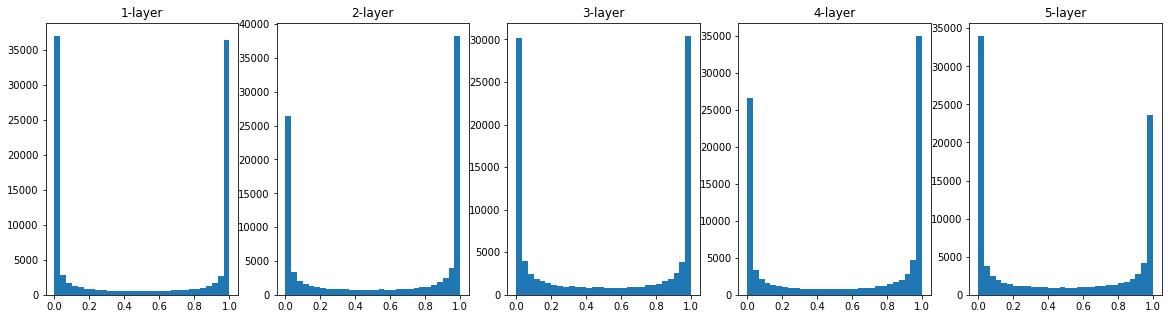

In [55]:
plt.figure(figsize=(20,5)) #横幅,縦幅
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

### Xavierの初期値

In [56]:
x = np.random.randn(1000, 100)
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) /np.sqrt(node_num)
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

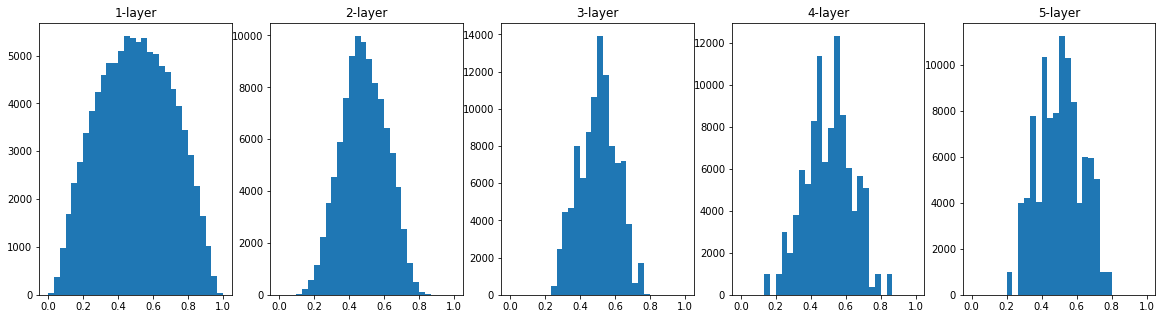

In [57]:
plt.figure(figsize=(20,5)) #横幅,縦幅
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

### ReLU + Heの初期値

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def Relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0/node_num)
    
    z = np.dot(x, w)
    a = Relu(z)
    activations[i] = a

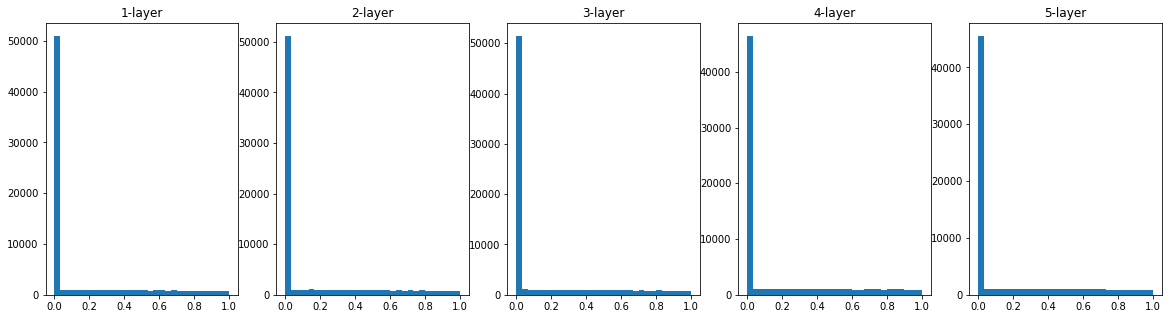

In [70]:
plt.figure(figsize=(20,5)) #横幅,縦幅
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

## Dropout

In [71]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
        def backward(self, dout):
            return dout * self.mask